# Prediction of Body Fat Percentage 

## General Goal

This project aims to study the relationship between body fat percentage and the clinically available measurements and then come up with a simple, robust, accurate and precise "rule-of-thumb" to predict percentage of body fat from a subset of predictors. 

## Data Preparation

The data set **bodyfat.csv** contains 252 observations and 17 variables with no missing data. Before preprocessing, we firstly delete **indo** features since it is just the index of each variable.

#### Data to be removed

We check the data set and find the 182$^{nd}$ man has 0% body fat. Re-calculating his body fat percentage using the Siri's equation gives a negative value. Thus, we decided to omit this observation as it is impossible for someone to have negative body fat percentage. <br>
The 216$^{th}$ man has the highest body fat percentage of 45% and the re-calculated body fat gives 47.4%. Also, this man has particularly large value of weight and other body circumferences compared to his peers. On the other hand, observation 39 has the largest weight, 363.1 lbs. The adiposity and height values were used to re-calculate his weight and it showed no error. Hence, observations 216 and 39 were removed as our focus group is normal men.<br>
The 42$^{nd}$ man is 29.50 inches tall. The re-calculated height value is 69.4 inches using adiposity and weight. This value was then corrected in the data set. 

#### Data to be altered
On the other hand, the Siri's equation shows that there exists a linear relationship between percentage of body fat and density. The following plot of body fat percentage against $\frac{1}{Density}$ is obtained to examine whether the two variables in our data set satisfy this relationship.<br>
From the **Fig1.1**, it is obvious that the majority of the points lie on the straight line except for observations 48, 76 and 96. <br>
Based on the sample data, we replaced the percentage of body fat for observations 48 and 76 with 14.1% and re-calculated and corrected the density for observation 96 (which is 1.0953). After making these changes, all points lie on the straight line.<br>

#### Recheck on data
The 172$^{nd}$ man body fat is 1.90 which is abnormal for a healthy adult man. The re-calculated body fat value using the Siri's equation returned a lower value of 0.70.Thus, we decided to remove this observation from the data set.
#### Summeraztion
To summarize, we delete 4 abonormal samples and alter 3 samples. The final data set for analysis contains 248 observations and 15 variables.

## Variable Selection

### Prilimilaries

We decide to use to linear regression model, since we find that almost all variables has a strong relation with bodyfat, and according to the result of box-cox plot, we do not need to transform bodyfat since $\lambda \approx 1$.

### Methods 

Several methods were used to select the best subset of predictors: forward, backward and stepwise selections using AIC and BIC criteria, best subset selection (based on both BIC and *R$^{2}_{adj}$*), Lasso regression as well as Mallow's Cp. <br>

The following table shows the subset of variables selected by each method. It is shown that the two variables abdomen and wrist are selected by all methods, suggesting that these variables are important in predicting body fat percentage.

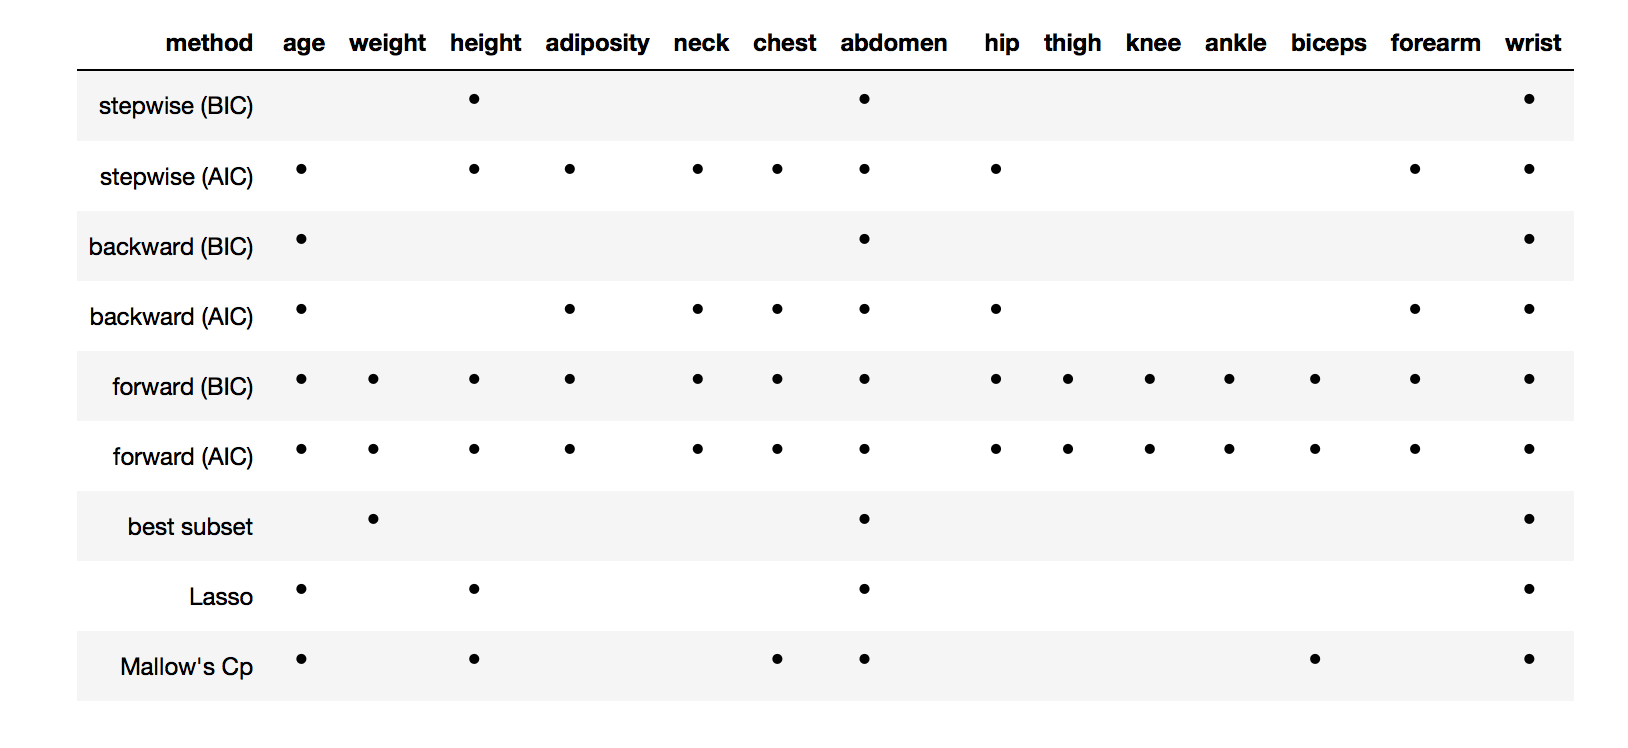

## Statistical Analysis

### A. Best Model Fitting

Here are some models listed to compare $R^2$ and $MSE$ (mean of least square error)[Table1]. The listed models are either models with variable selection methods or models with small amount of features.<br>
We decide to choose the model with two features: abdomen and wrist. There are mainly three reasons.
1. The results of different variable selection methods above all include abdomen and wrist variables.
2. We find that measurement of Adjusted $R^2$ and $MSE$ do not imporve too much after adding more variables. 
3. The model with only two variables has small model complexity and it is easy to interpret each variable.

Our final model is $Bodyfat = \beta_0 + \beta_1 \cdot abdomen + \beta_2 \cdot wrist$. <br>

### B. Model Diagnostics
We generally check the model based on three parts: the influential points, the assumption on normality and the assumption on residuals.

#### 1. Checking for Influential Points

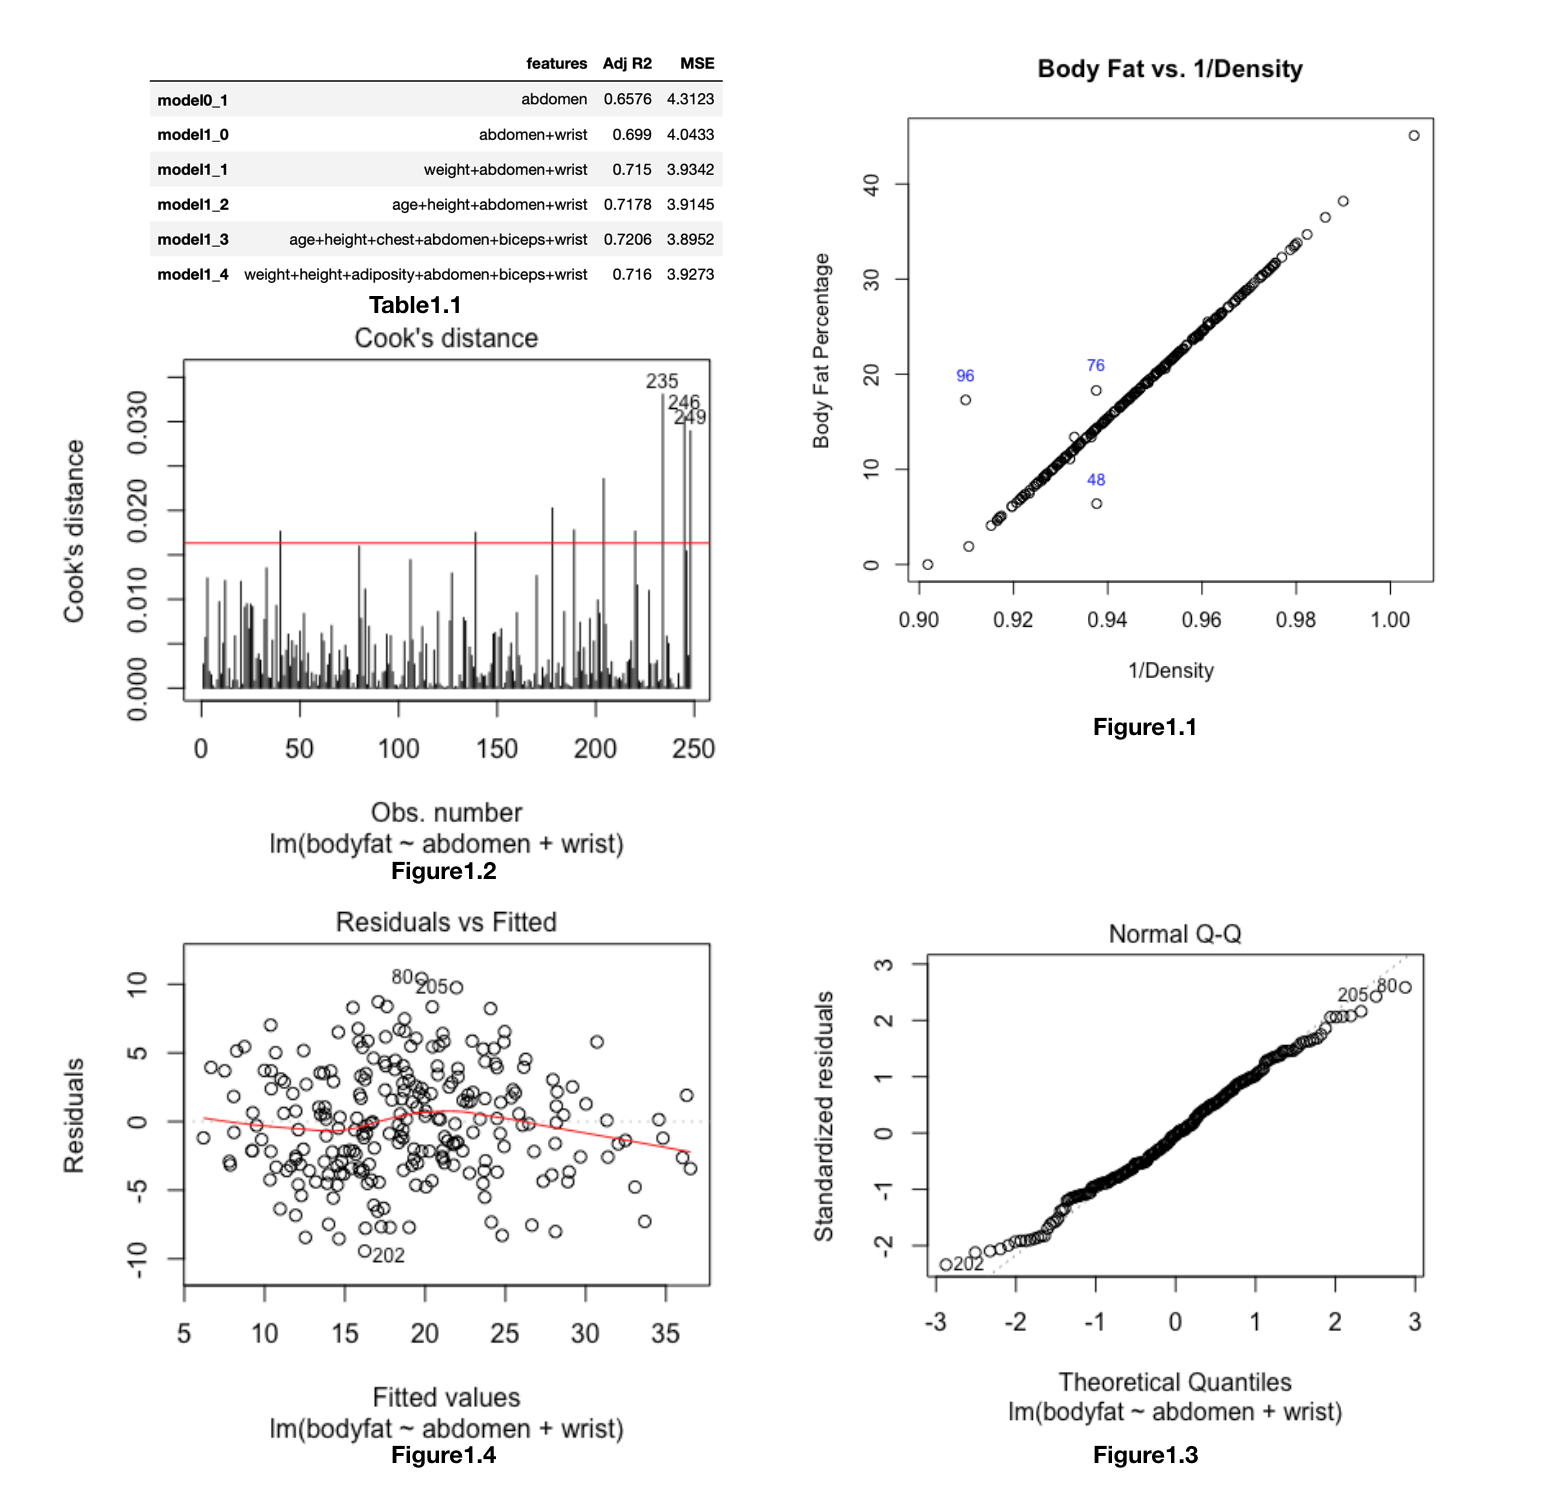

Based on **Figure1.2**,we find that there are 9 points which Cook's Distance is greater than the threshold value. We check measurements for these observations and think that they all look normal. Therefore we decided to retain all the observations in our model.

#### 2. Checking for Normality

According to the QQ-plot **Figure1.3**, all points are close to the dashed diagnoal line, so we believe that the residuals follow the normally distribution.

#### 3. Checking for Residuals

According to **Figure1.4**,the model tends to have a higher variance when fitted values range from 15 to 25. Also, the mean of the resiaduals become smaller when fitted value is in the range of 30 to 35. So we believe that our model does not satisfy $E(\varepsilon) = 0$ and $Var(\varepsilon) =$ constant $\sigma^2$ perfectly.

### C. Hypothesis Testing

We generally do the following 2 hypothesis testing:
1. t-testing on coefficients $H_0: \beta_i = 0$ v.s. $H_1: \beta_i \neq 0$
2. F-testing on the full model we choose $H_0 = \beta_1 = \beta_2 = 0$ v.s. $H_1: H_0$ not true

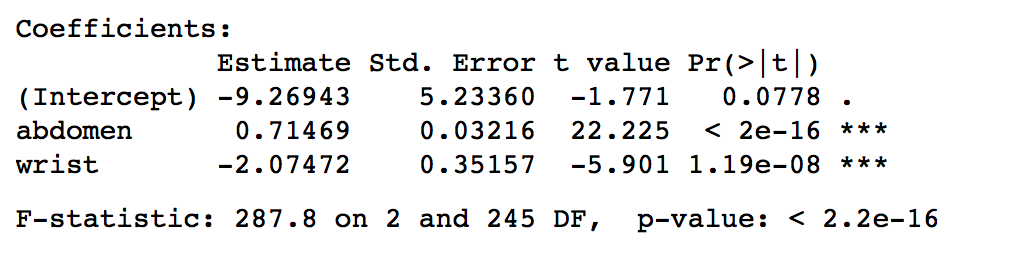

The result is shown above.
Based on F-testing, our model has a siginficant effect for all variables.<br>
Based on t-testing, all of our variables are significant according to p-values and standard errors for each variable is small, with a significant level less that 0.05. The abdomen variable has a positive effect on bodyfat while the wrist variable has a negative effect on bodyfat. <br>

## Contributions
1. Bi Qing Teng: Analysing raw data, data cleaning and variable selection
2. Xiaoxiang Hua: Variable selection, Model Diagnostics, Model interpretation and Model strength and weaknesses
3. Yijie Liu: Write the Shiny app code, and make the slides, and jupyter notebook summary.